## AMBER Tutorials
## Simulation of Human Neutrophil Elastase (HNE) system

## HW4: Amber Tutorial 1A

### Part 1. Preparation of the human neutrophil elastase (HNE) system

In [ ]:
$ srun -c4 -t4:00:00 --mem=4000 --pty /bin/bash 

In [ ]:
$ module load amber/openmpi/intel/22.03

# openmpi/gcc/3.1.4
# openmpi/gcc/4.0.5
# openmpi/intel/4.0.5
# openmpi/intel/4.1.1

# amber/openmpi/intel/20.06
# amber/openmpi/intel/20.11                      
# amber/openmpi/intel/22.00                     
# amber/openmpi/intel/22.03

#### 1.1 Obtain and parse the PDB file

In [ ]:
$ wget https://files.rcsb.org/view/2Z7F.pdb

In [ ]:
# 2Z7F.pdb contains chain E, chain I, and two ligands(NAG and FUC)
# Keep only chain E, extract chain I from the original PDB fil
# The -v option inverts the match, so egrep -v will exclude chain "I"

$ grep "ATOM " 2Z7F.pdb | egrep -v " I " > 2z7f_chainE.pdb

In [ ]:
$ grep "HOH " 2Z7F.pdb | egrep -v " I " > 2z7f_chainE_XWAT.pdb

#### 1.2 Protonate the protein

In [ ]:
# Protonate the protein using  PDB2PQR webserver (https://server.poissonboltzmann.org/pdb2pqr)
# Generate the 2z7f_chainE.pqr

# PARSE force field
# AMBER naming scheme
# PROPKA as pKa option
# checked the settings: (1) "Ensure that new atoms are not rebuilt too close to existing atoms", and (2) "Optimize the hydrogen bonding network".

#### 1.3 Add crystal waters, disulfide bonds, solvate the system, and prepare prmtop and inpcrd files using tleap

In [ ]:
$ tleap

In [ ]:
# loads FF14SB the force field parameters for proteins

$ source leaprc.protein.ff14SB

In [ ]:
# loads the parameters for the TIP3P water model

$ source leaprc.water.tip3p

In [ ]:
# loads the GAFF force field for small organic molecules 

$ source leaprc.gaff2

In [ ]:
# Load the protein

$ prot = loadpdb 2z7f_chainE.pqr

# Loading PDB file: ./2z7f_chainE.pqr
# total atoms in file: 3292

In [ ]:
# Renumber the protein residue starting from 1 instead of 16 in .pqr file
# Make the numbering continuously instead of missing some residues
# For the uncertain residue, keep the first one by defualt 
# Generate 2z7f_chainE_renum.pdb file

$ savepdb prot 2z7f_chainE_renum.pdb

# Warning:  Converting N-terminal residue name to PDB format: NILE -> ILE
# Warning:  Converting C-terminal residue name to PDB format: CGLN -> GLN

In [ ]:
$ quit

# Exiting LEaP: Errors = 0; Warnings = 2; Notes = 0.

#####  Bond the disulfide in tleap

In [ ]:
$ tleap

In [ ]:
$ source leaprc.protein.ff14SB

In [ ]:
$ source leaprc.gaff2

In [ ]:
$ prot = loadpdb 2z7f_chainE_renum.pdb

# Loading PDB file: ./2z7f_chainE_renum.pdb
# total atoms in file: 3292

In [ ]:
# check the bonding information of one sulfide atom for example Cys26@SG

$ desc prot.26.SG

# Bonded to .R<CYX 26>.A<CB 5> by a single bond.

In [ ]:
# bond disulfide bond

$ bond prot.26.SG prot.42.SG

In [ ]:
# check the bonding information again

$ desc prot.26.SG

# Bonded to .R<CYX 26>.A<CB 5> by a single bond.
# Bonded to .R<CYX 42>.A<SG 8> by a single bond.

In [ ]:
# Bond other disulfide bonds

$ bond prot.169.SG prot.194.SG
$ bond prot.152.SG prot.158.SG
$ bond prot.122.SG prot.179.SG


In [ ]:
$ xwat = loadpdb 2z7f_chainE_XWAT.pdb

# Loading PDB file: ./2z7f_chainE_XWAT.pdb
#   total atoms in file: 196
#   Leap added 392 missing atoms according to residue templates:
#        392 H / lone pairs

In [ ]:
# combine the protein and waters

$ complex = combine {prot xwat}

In [ ]:
# save amber topology and coordinate files

$ saveamberparm prot HNE_noWAT.prmtop HNE_noWAT.inpcrd

# Warning: The unperturbed charge of the unit (12.000000) is not zero.
# Marking per-residue atom chain types.
#   (Residues lacking connect0/connect1 - 
#    these don't have chain types marked:

#         res     total affected

#         CGLN    1
#         NILE    1
#   )

In [ ]:
# check the charge of the complex system and we need to add ions to neutralize it

$ charge complex

# Total unperturbed charge:  12.000000
# Total perturbed charge:    12.000000

In [ ]:
# add Cl- ions to balance out the charges

$ addions2 complex Cl- 0

# 12 Cl- ions required to neutralize.
# Adding 12 counter ions to "complex" using 1A grid
# Grid extends from solute vdw + 2.51  to  8.51
# Resolution:      1.00 Angstrom.
# Calculating grid charges
# Placed Cl- in complex at (38.01, 116.51, 18.40).
# Placed Cl- in complex at (29.01, 117.51, 24.40).
# Placed Cl- in complex at (16.01, 112.51, -6.60).
# Placed Cl- in complex at (37.01, 121.51, 10.40).
# Placed Cl- in complex at (32.01, 93.51, 32.40).
# Placed Cl- in complex at (28.01, 118.51, 15.40).
# Placed Cl- in complex at (33.01, 123.51, 0.40).
# Placed Cl- in complex at (36.01, 110.51, 27.40).
# Placed Cl- in complex at (41.01, 88.51, 18.40).
# Placed Cl- in complex at (15.01, 110.51, 21.40).
# Placed Cl- in complex at (25.01, 77.51, 19.40).
# Placed Cl- in complex at (24.01, 113.51, 29.40).

In [ ]:
# solvate the protein in a TIP3P water box, and we want at least 12 A between our protein 
# surface and the edge of the water box

$ solvatebox complex TIP3PBOX 12.0 

#   Solute vdw bounding box:              41.355 51.026 54.159
#   Total bounding box for atom centers:  65.355 75.026 78.159
#   Solvent unit box:                     18.774 18.774 18.774
#   Total vdw box size:                   68.705 77.891 81.106 angstroms.
#   Volume: 434035.967 A^3 
#   Total mass 213271.064 amu,  Density 0.816 g/cc
#   Added 10325 residues.

In [ ]:
# check the structures and it will show some information or warning or errors.

$ check complex

# check:  Warnings: 37
# Unit is OK.

In [ ]:
# save solvated complex

$ saveamberparm complex HNE_sol.prmtop HNE_sol.inpcrd

In [ ]:
# save a pdb of the solvated HNC system

$ savepdb complex HNC_sol0.pdb

# Exiting LEaP: Errors = 0; Warnings = 40; Notes = 1.

#### 1.4 Minimization of the system

$ srun --tasks-per-node=4 --time=2:00:00 --mem=4GB --pty /bin/bash

In [ ]:
# Create min_sol.in file for minimization of waters
    """
Minimization of water molecules
&cntrl
imin = 1,
maxcyc=5000,
ncyc=3000,
ntb=1,
cut=10,
ntpr=5,
ntr=1, restraintmask=':1-218',
restraint_wt=2.0,
/
    """

In [ ]:
# Create min_all.in file minimization of the whole system
    """
Minimization of the whole system
&cntrl
imin = 1,
maxcyc=10000, ncyc=7000,
ntb=1, ntr=0, cut=10, ntpr=5,
/
    """

In [ ]:
$ module swap amber/openmpi/intel/22.03 amber/openmpi/intel/22.00

In [ ]:
$ mpiexec pmemd.MPI -O -i min_sol.in -o min_sol.out -p HNE_sol.prmtop -c HNE_sol.inpcrd -r min_sol.rst -ref HNE_sol.inpcrd 

In [ ]:
$ mpiexec pmemd.MPI -O -i min_all.in -o min_all.out -p HNE_sol.prmtop -c min_sol.rst -r min_all.rst -ref min_sol.rst

#### 1.5 Data Analysis

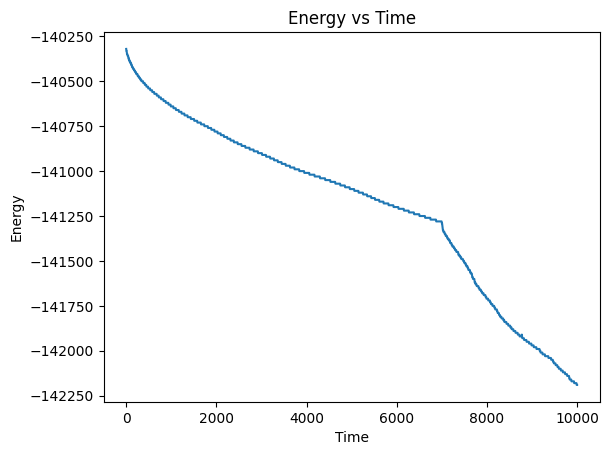

In [ ]:
import matplotlib.pyplot as plt

# Specify the file path
file_path = "min/minall/summary.ENERGY"

# Read data from file
time = []
energy = []
with open(file_path, 'r') as file:
    for line in file:
        columns = line.split()
        time.append(float(columns[0]))
        energy.append(float(columns[1]))

# Plot the graph
plt.plot(time, energy)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs Time')
plt.show()

## Week 5: Amber Tutorial 1B
### (Heat the system and then carry out MD simulations to equilibrate the system)

### Part 2: Heating and equilibration

#### 2.1 Heating and equilibration

In [ ]:
# 1. Heating of the system from 10 K to 300K in 50 ps.(heat.in)
# 2. Equilibrate the system density at 300K at constant pressure for 50 ps.(density.in)
# 3. Equilibrate the system at 300K at constant pressure with lower restraints for 100 ps. (equil.in)

In [ ]:
# create a new folder for heating and equilibration

$ mkdir equ
$ cd equ
$ cp ../min/HNE_sol.prmtop .
$ cp ../min/min_all.rst .


In [ ]:
# Create heat.in input file
# Heating of protein from 10K to 300K with weak restraints and constant volume

    """
&cntrl 
imin = 0, ! no energy minimization 
irest = 0, ! no restart 
ntx = 1,! no initial velocities will be read 
ig = -1, ! random initial velocities 
nstlim = 25000, ! run for 0.05 ns 
dt = 0.002, ! step length (fs) 
ntc = 2,! bonds involving H are constrained 
ntf = 2, 
cut = 12.0, 
ntb = 1, 
ntpr = 500, 
ntwx = 500,! write the structure every 500th step 
ntt = 3, ! Langevin temperature control
gamma_ln = 2.0, 
tempi = 10.0, ! initial temperature 
temp0 = 300.0, ! reference temperature 
ntr = 1,
restraintmask = ':1-218', 
restraint_wt = 2.0, ! restraint weight 
nmropt = 1,! flag for restraints set below 
ioutfm = 1,! netcdf trajectory 
/
&wt TYPE='TEMP0', istep1=0, istep2=25000, 
value1=0.1, value2=300.0, / 
&wt TYPE='END' /
    """


In [ ]:
# Create density.in file
# Equilibrate the system density at 300K at constant pressure for 50 ps.

    """    
&cntrl 
imin=0, 
irest=1, ! restart the simulation from last run 
ntx=5, 
nstlim=25000, dt=0.002, 
ntc=2,ntf=2, 
cut=8.0, ntb=2, 
ntp=1, taup=1.0,! constant pressure 
ntpr=500, ntwx=500, 
ntt=3, gamma_ln=2.0, 
temp0=300.0, 
ntr=1, restraintmask=':1-218', 
restraint_wt=2.0, 
ioutfm = 1, 
/
    """


In [ ]:
# Create equil.in
# Equilibrate the system at 300K at constant pressure with lower restraints for 100 ps 

    """
&cntrl 
imin = 0, irest = 1,ntx = 5, nstlim = 50000, dt = 0.002, 
ntc = 2, ntf = 2, 
cut = 10.0, ntb = 2, ntp = 1, taup=2.0, 
ntpr = 500, ntwx = 500, 
ntt = 3, gamma_ln = 2.0, 
temp0 = 300.0, 
ntr = 1, restraintmask = ':1-218', 
restraint_wt = 0.5, 
ioutfm = 1, 
/
    """


In [ ]:
# Make amberjob1.sbatch file

    """
#SBATCH --job-name=Amber
#SBATCH --nodes=1
#SBATCH --tasks-per-node=20
#SBATCH --time=48:00:00
#SBATCH --mem=20GB


# Comments start here, above are not comments and should be in your script 
# go to your working directory: /scratch/qo210/mygaussianproject/Week4/HNE/equ  
cd /scratch/qo210/mygaussianproject/Week4/HNE/equ    

# load module to run amber

module purge
module load amber/openmpi/intel/20.11 

# run heating job
srun pmemd.MPI -O -i heat.in -o heat.out -p HNE_sol.prmtop -c min_all.rst -r heat.rst -x heat.mdcrd -ref min_all.rst

# run density job
srun pmemd.MPI -O -i density.in -o density.out -p HNE_sol.prmtop   -c heat.rst -r density.rst -x density.mdcrd -ref min_all.rst

# run equil job
srun pmemd.MPI -O -i equil.in -o equil.out -p HNE_sol.prmtop -c density.rst -r equil.rst -x equil.mdcrd -ref min_all.rst
    """


In [ ]:
# Submit the job 
$ sbatch  amberjob1.sbatch

# check job status
$ squeue -j job_id
$ squeue -u qo210

In [ ]:
# File generated: heat.out, density.out, and equil.out


#### 2.2 Analyzing equilibration output files

In [ ]:
# module load amber/openmpi/intel/20.11
# Make a "analysis" subfolder in the equ folder 

In [ ]:
# Generate series of summary files from heat.out, density.out, and equil.out
# process_mdout perl: can process any files and append the results to single summary files
# This includes the potential(.EPTOT), kinetic(.EKTOT) and total energies(.ETOT)
# Also includes temperature, pressure, volume and density

$ process_mdout.perl ../heat.out ../density.out ../equil.out

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

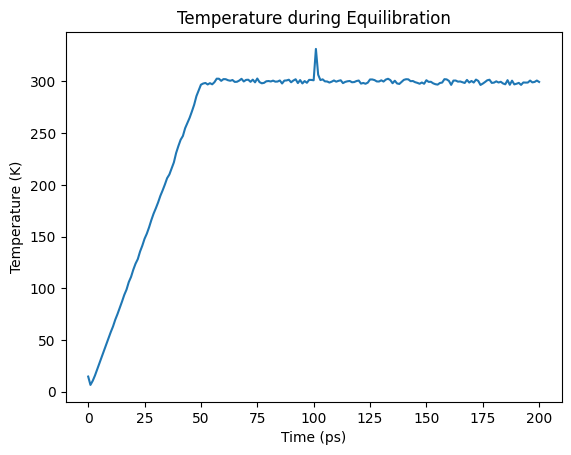

In [2]:
# Plot temperature of the HNE system over the equilibration phase

file_path = "equ/analysis/summary.TEMP"
data = pd.read_csv(file_path, sep="\s+", header=None, names=['time', 'temperature'])

# Plot the graph
plt.plot(data['time'], data['temperature'])
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature during Equilibration')
plt.show()

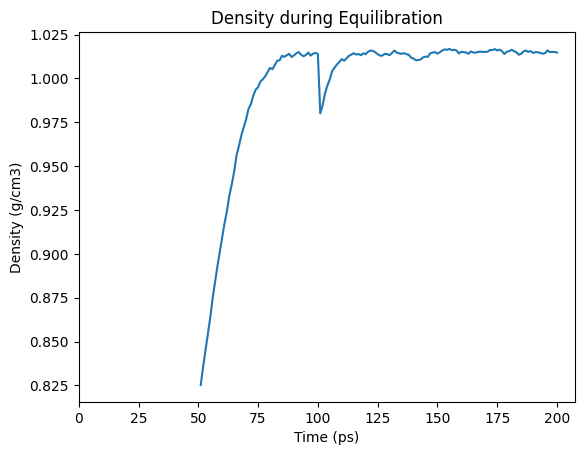

In [3]:
# Plot the density of the HNE system throughout equilibration

file_path = "equ/analysis/summary.DENSITY"
data = pd.read_csv(file_path, sep="\s+", header=None, names=['time', 'density'])

# Filter out rows where column 2 is missing
data_filtered = data.dropna(subset=['density'])

# Plot the graph
plt.plot(data_filtered['time'], data_filtered['density'])
plt.xlim(left=0)
plt.xlabel('Time (ps)')
plt.ylabel('Density (g/cm3)')
plt.title('Density during Equilibration')
plt.show()


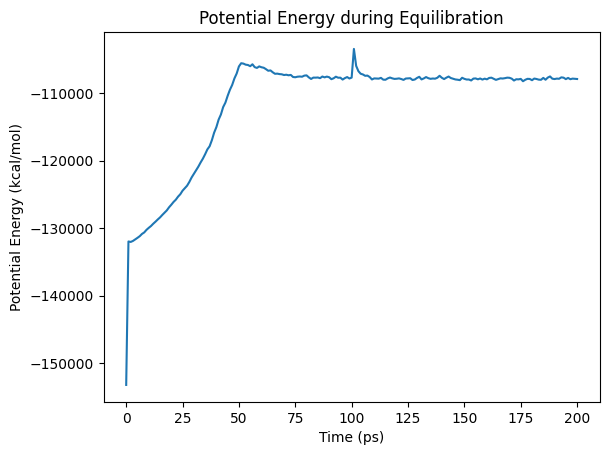

In [4]:
# Graph potential energy of the HNE system throughout equilibration.

file_path = "equ/analysis/summary.EPTOT"
data = pd.read_csv(file_path, sep="\s+", header=None, names=['time', 'potential_energy'])

# Plot the graph
plt.plot(data['time'], data['potential_energy'])
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (kcal/mol)')
plt.title('Potential Energy during Equilibration')
plt.show()

#### 2.3 Analyzing the trajectory
##### Goal: Examine structure change during MD simulations

In [ ]:
# Use cpptraj to calculate root mean square deviation (RMSD) for us as a function of time
# Make initial_rmsd.ptraj input file
# Consider just the main backbone atoms, N, CA, C.

    """
trajin ../heat.mdcrd
trajin ../density.mdcrd 
trajin ../equil.mdcrd 
rms first out HNE_equilibration_rms.dat @C,CA,N time 1
    """
# rms means calculate rmsd
# first means reference is the first snapshot
# out HNE_equilibration_rms.dat means output result to file HNE_equilibrium_rms.dat.
# @C,CA,N means using these types of atoms for rmsd calculation.

In [ ]:
# Run cpptraj
# Output file: HNE_equilibration_rms.dat
 
$ cpptraj ../HNE_sol.prmtop initial_rmsd.ptraj

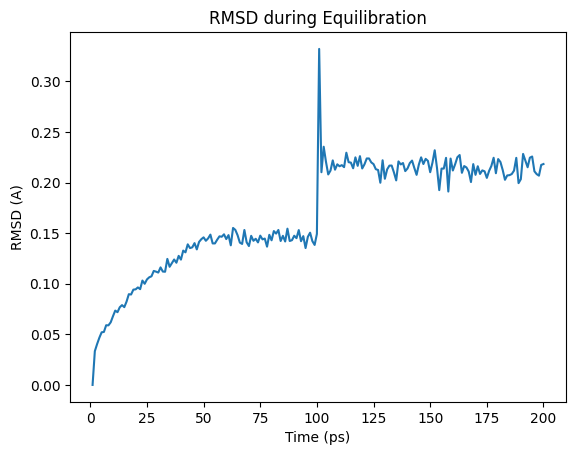

In [12]:
# The RMSD of the HNE system throughout equilibration

file_path = "equ/analysis/HNE_equilibration_rms.dat"
data = pd.read_csv(file_path, sep="\s+")

# Plot the graph
plt.plot(data['#Frame'], data['RMSD_00001'])
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (A)')
plt.title('RMSD during Equilibration')

plt.show()

#### 2.4 Re-imaging the trajectory back into the primary box

In [ ]:
# Make reimage.ptraj input file

    """
trajin ../heat.mdcrd
trajin ../density.mdcrd 
trajin ../equil.mdcrd
center :1-218 
image familiar 
rms first @C,CA,N 
trajout equilibration_reimaged.mdcrd
    """

In [ ]:
cćptraj ../HNE_sol.prmtop reimage.ptraj

# Output file: equilibration_reimaged.mdcrd
# Warning: Set 200; unit cell is not X-aligned. Box cannot be properly stored as Amber ASCII trajectory?
# Read 200 frames and processed 200 frames.
# TIME: Avg. throughput= 22.0731 frames / second.

### Part 3: MD Production 

In [ ]:
# Make a new md file in Week4

mkdir md
cd md
cp ../equ/HNE_sol.prmtop .
cp ../equ/equil.rst .


In [ ]:
    """
MD simulation NPT without restraint
&cntrl 
imin = 0, irest = 1,ntx = 5, nstlim = 1000000, dt = 0.002, 
ntc = 2, ntf = 2, 
cut = 10.0, ntb = 2, ntp = 1, taup=2.0, 
ntpr = 500, ntwx = 500, 
ntt = 3, gamma_ln = 2.0, 
temp0 = 300.0, 
ioutfm = 1, 
/
    """

In [ ]:
# Make an input file amberjob2.sbatch

"""
#!/bin/bash

#SBATCH --job-name=Amber
#SBATCH --nodes=1
#SBATCH --tasks-per-node=20
#SBATCH --time=48:00:00
#SBATCH --mem=20GB

cd /scratch/qo210/mygaussianproject/Week4/HNE/md  

module purge

module load amber/openmpi/intel/20.11 

srun pmemd.MPI -O -i prod_npt.in -o prod1.out -p HNE_sol.prmtop -c equil.rst -r prod1.rst -x prod1.mdcrd

srun pmemd.MPI -O -i prod_npt.in -o prod2.out -p HNE_sol.prmtop -c prod1.rst -r prod2.rst -x prod2.mdcrd
"""


In [ ]:
# Submit the job 
$ sbatch  amberjob2.sbatch

# check job status
$ squeue -j job_id
$ squeue -u qo210

### Part 4. Analyzing the trajectory

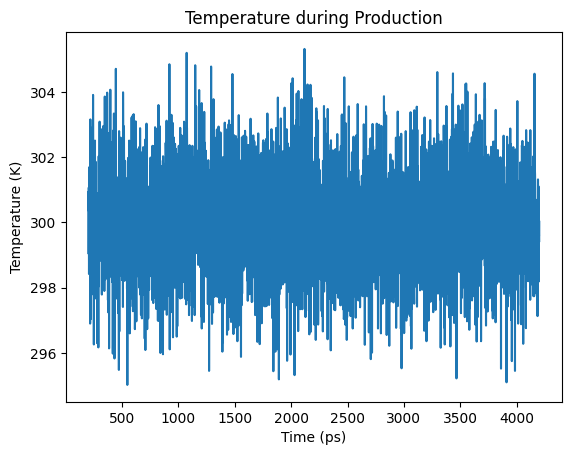

In [14]:
# Temperature of the HNE system throughout production

import matplotlib.pyplot as plt

# Specify the file path
file_path = "md/analysis/summary.TEMP"
data = pd.read_csv(file_path, sep="\s+", header=None, names=['time', 'temperature'])

# Plot the graph
plt.plot(data['time'], data['temperature'])
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature during Production')
plt.show()

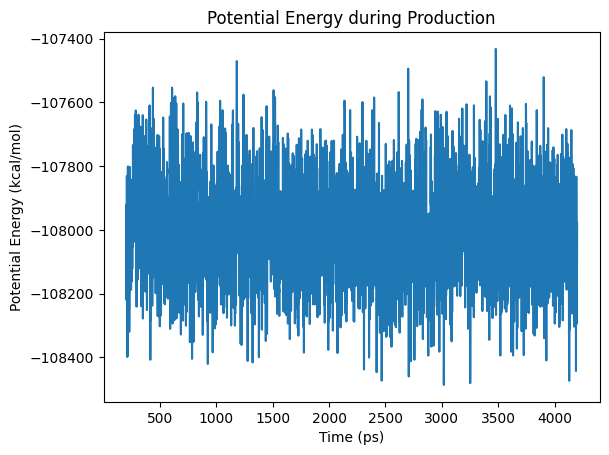

In [15]:
# Graph potential energy of the HNE system throughout production

file_path = "md/analysis/summary.EPTOT"
data = pd.read_csv(file_path, sep="\s+", header=None, names=['time', 'potential_energy'])

# Plot the graph
plt.plot(data['time'], data['potential_energy'])
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (kcal/mol)')
plt.title('Potential Energy during Production')
plt.show()

#### 4.2 Re-image the trajectory back into the primary box 

In [ ]:
# Make input file short_prod.ptraj 

    """
trajin ../prod1.mdcrd 1 2000 4 
trajin ../prod2.mdcrd 1 2000 4 
center :1-218 
image familiar 
rms first @N,CA,C 
trajout prod_4ns.mdcrd

    """

In [ ]:
# Create new trajectory file (prod_4ns.mdcrd) which is smaller (1000 frames) 
# And the atoms are placed in the primary box

$ cpptraj ../HNE_sol.prmtop short_prod.ptraj

# Read 1000 frames and processed 1000 frames.
# TIME: Avg. throughput= 21.2518 frames / second.


#### 4.3 RMSD Analysis

In [ ]:
# Use cpptraj to calculate root mean square deviation (RMSD) for us as a function of time
# Make prod_rmsd.ptraj input file
# Consider just the main backbone atoms, N, CA, C.

    """
trajin prod_4ns.mdcrd 
rms first mass out prod_rmsd.out @N,CA,C time 4
    """
    
# @C,CA,N means using these types of atoms for rmsd calculation

In [ ]:
$ cpptraj ../HNE_sol.prmtop prod_rmsd.ptraj

# TIME: Total execution time: 12.6320 seconds.

In [ ]:
# And plot the resulting values in xmgrace
# Request a computer

$ module load grace/intel/5.1.25
$ xmgrace prod_rmsd.out 

#### 4.4 Distances

In [ ]:
# measure distances between atoms during the simulation
# Make dists.ptraj file

    """
trajin prod_4ns.mdcrd 
distance d1 :41@HD1 :88@OD2 out dist1.out 
distance d2 :41@H :88@OD1 out dist2.out

    """

In [ ]:
$ cpptraj ../HNE_sol.prmtop dists.ptraj

# TIME: Total execution time: 12.5695 seconds.
# Output file: dist1.out 
# Output file: dist2.out 

#### Structural waters 

In [ ]:
# search for structural water molecules which potentially provides and H-bond bridge between two residues

    """
trajin prod_4ns.mdcrd 
rms first mass @N,CA,C 
atomicfluct out wat_flucts.out '* & !:1-218' bfactor byres
    """

In [ ]:
$ cpptraj ../HNE_sol.prmtop bfactor.ptraj

# Output file: wat_flucts.out 

Min B-factors:
Residue 234.0: 6.07
Residue 232.0: 6.48
Residue 247.0: 7.22
Max B-factors:
Residue 10124.0: 52922.54
Residue 6636.0: 52399.64
Residue 7600.0: 52322.33


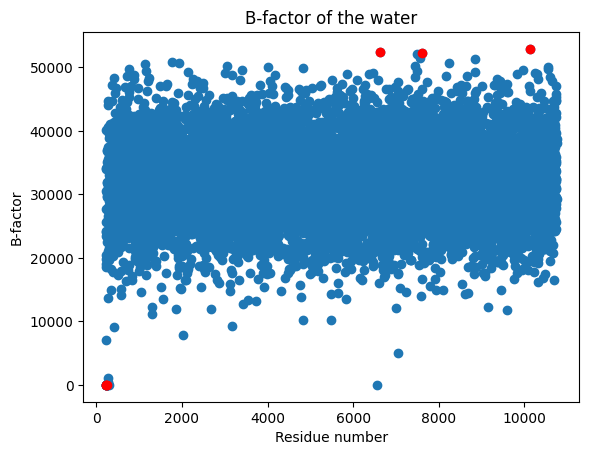

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "md/analysis/wat_flucts.out"
data = pd.read_csv(file_path, sep="\s+")

# Plot the graph as a scatter plot
plt.scatter(data['#Res'], data['B-factors'])
plt.xlabel('Residue number')
plt.ylabel('B-factor')
plt.title('B-factor of the water')

# Identify the indices of the 3 min and 3 max values
min_indices = data['B-factors'].nsmallest(3).index
max_indices = data['B-factors'].nlargest(3).index

# Print the x and y values for the 3 min and 3 max
print("Min B-factors:")
for idx in min_indices:
    print(f"Residue {data.loc[idx, '#Res']}: {data.loc[idx, 'B-factors']:.2f}")

print("Max B-factors:")
for idx in max_indices:
    print(f"Residue {data.loc[idx, '#Res']}: {data.loc[idx, 'B-factors']:.2f}")

# Label the min and max points in red
for idx in min_indices:
    plt.scatter(data.loc[idx, '#Res'], data.loc[idx, 'B-factors'], color='red')
for idx in max_indices:
    plt.scatter(data.loc[idx, '#Res'], data.loc[idx, 'B-factors'], color='red')


plt.show()


In [22]:
# Filter the data for B-factors less than 100
filtered_data = data[data['B-factors'] < 100]

# Print the residues with B-factors less than 100
print("Residues with B-factors less than 100:")
for index, row in filtered_data.iterrows():
    print(f"Residue {row['#Res']}: B-factor = {row['B-factors']:.2f}")

Residues with B-factors less than 100:
Residue 231.0: B-factor = 10.97
Residue 232.0: B-factor = 6.48
Residue 233.0: B-factor = 8.56
Residue 234.0: B-factor = 6.07
Residue 236.0: B-factor = 9.41
Residue 238.0: B-factor = 14.32
Residue 240.0: B-factor = 13.97
Residue 241.0: B-factor = 8.78
Residue 243.0: B-factor = 9.12
Residue 246.0: B-factor = 11.23
Residue 247.0: B-factor = 7.22
Residue 259.0: B-factor = 20.69
Residue 260.0: B-factor = 35.04
Residue 292.0: B-factor = 24.12
Residue 6556.0: B-factor = 36.72


In [ ]:
# Make small.ptraj file

    """
trajin prod_4ns.mdcrd 1 1000 10
trajout prod_mov.mdcrd

    """

In [ ]:
$ cpptraj ../HNE_sol.prmtop small.ptraj